(0.0, 3e-06)

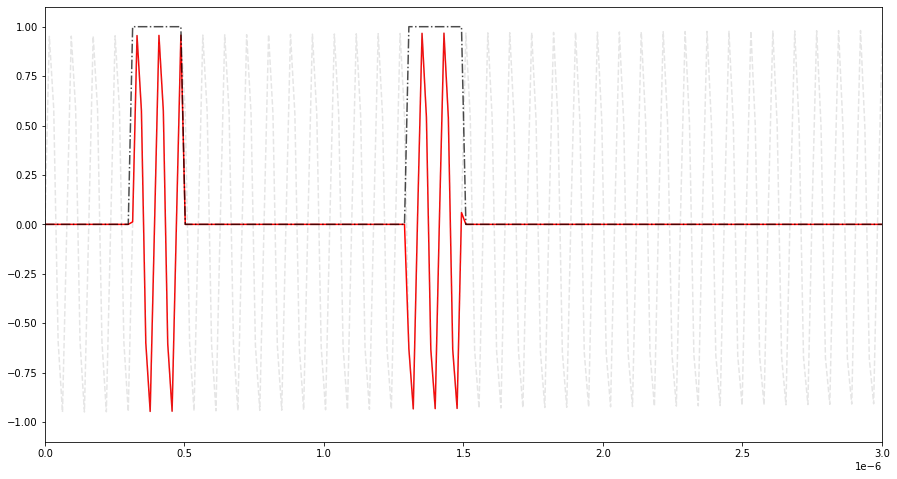

In [124]:
import time, os, sys
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from IPython.core.display import HTML
# with open( './custom.css', 'r' ) as f: style = f.read()
# HTML( style )
display(HTML("<style>.container { width:90% !important; }</style>"))

#rectangular pulses
def Rpulses(pwidth=1, shift=0, initime=-10, endtime=10, resolution=2000):
    
    '''
    Rpulses() : function that generates Rectangular Pulses. This function does have the chance to change the
    width of the pulse directly (i.e change pwidth).
    
    INPUT
    pwidth       : width of the pulse, normally the origin is left hand side of the pulse where changes from 0->1
    shift        : offset of the pulse, helpful for the combination of pulses
    initime      : initial value of the time scale ti
    endtime      : final value of the time scale tf
    resolution   : resolution of the pulses, if resolution is too low, then the rectangular pulse becomes trapezoid
    
    OUTPUT
    time    : domain values of the pulse function 
    pulse   : pulse function
    '''
    domain = np.linspace(initime, endtime, resolution, endpoint=True) #domain of the whole function
    HeavisidePos = np.heaviside((domain - shift), 0.5) #mid point set to intermediate value
    HeavisideNeg = np.heaviside(-(domain - shift) + pwidth, 0.5)
    
    pulse = (HeavisidePos + HeavisideNeg - 1) #the (-1) is an offset due to the sum 
    
    '''
    #Example of addition of 2 rectanglar pulse 
    dom, fpulse = Rpulses(pwidth=1, shift=0, initime=-10, endtime=10, resolution=1000)
    dom, fpulse2 = Rpulses(pwidth=2, shift=5, initime=-10, endtime=10, resolution=1000)
    plt.plot(dom, fpulse+fpulse2)
    '''
    return domain, pulse


def buildSequence(TIMEseq, amplst, initPlst, widthlst):
    '''
    buildSequence() : function that generates the pulse sequence of pulses for the different couplings and
    detunings of the Hamiltonians amplitudes.
    
    INPUT
    amplst : amplitude list 
        e.g [Omega1, Omega2]
        
    initPlst : initial times list 
        e.g for Omega1 -> [0, 3, 100]; for Omega2 -> [5, 20] then [[0, 3, 100], [5, 20]]
    
    widthlst : pulse width list
        e.g for Omega1 -> [1, 1, 2]; for Omega2 -> [1, 1, 2] then [[1, 1, 2], [1, 1]]
        
    OUTPUT
    Sequence: list of pulses for each amplitude
    '''
    
    ampPulselst = []
    count=0;
    for amp in amplst:
        pulselst = [];
        for ti,wi in zip(initPlst[count], widthlst[count]):
            dom, fpulse = Rpulses(pwidth = wi, shift = ti, initime = TIMEseq[0], endtime = TIMEseq[len(TIMEseq)-1], resolution=2000)
            pulselst.append(fpulse)
        ampPulse = amp*sum(pulselst)
        ampPulselst.append(ampPulse)
        count+=1;
    
#     for i in ampPulselst:
#         plt.plot(TIMEseq, i)
        
    '''
    #example
    dom = np.linspace(0, 30, 1000, endpoint=True)
    buildSequence([10, 2],  [[0, 3, 20], [5, 20]],  [[1, 1, 2], [1, 1]], dom)
    '''
    return ampPulselst

initime = 0.0; endtime = 1000.0; 
res = 2000;
times = np.linspace(initime, endtime, res, endpoint=True)

#rf signal
Omega_rf = 80e6 #Hz
#time domain
t = np.linspace(0, 5*np.pi*2e-6, res)


#pulses' arguments

#amplitudes
ampd1 = 1.0; ampd2 = 1; ampc1 = 1; ampc2 = 1; ampc3 = 1; ampc4 = 1;
#shifts
shiftd1 = 30/np.pi; shiftd2 = 130/np.pi; shiftc1 = 0; shiftc2 = 0+2*np.pi; shiftc3 = 10; shiftc4 = 10+2*np.pi;
#widths
widthd1 = 20/np.pi; widthd2 = 20/np.pi; widthc1 = np.pi; widthc2 = np.pi; widthc3 = np.pi; widthc4 = np.pi;

sargs = {'ampd1': ampd1,'ampd2': ampd2,'ampc1': ampc1,'ampc2': ampc2,'ampc3': ampc3,'ampc4': ampc4,
         'shiftd1': shiftd1,'shiftd2': shiftd2,'shiftc1': shiftc1,'shiftc2': shiftc2,'shiftc3': shiftc3,'shiftc4': shiftc4,
        'widthd1': widthd1,'widthd2': widthd2,'widthc1': widthc1,'widthc2': widthc2,'widthc3': widthc3,'widthc4': widthc4}

#pulse tracks
ptrack1 = buildSequence(times, [sargs['ampd1']],  [[sargs['shiftd1']]], [[sargs['widthd1']]])

ptrack2 = buildSequence(times, [sargs['ampd2']],  [[sargs['shiftd2']]], [[sargs['widthd2']]])

# ptrack3 = buildSequence(times, [sargs['ampc1']],  [[sargs['shiftc1']]], [[sargs['widthc1']]])

# ptrack4 = buildSequence(times, [sargs['ampc2']],  [[sargs['shiftc2']]], [[sargs['widthc2']]])

# ptrack5 = buildSequence(times, [sargs['ampc3']],  [[sargs['shiftc3']]], [[sargs['widthc3']]])

# ptrack6 = buildSequence(times, [sargs['ampc4']],  [[sargs['shiftc4']]], [[sargs['widthc4']]])




for i in range(len(times)):
    seqP=1*ptrack1[0] + 1*ptrack2[0]
    seq=(seqP)*np.sin(Omega_rf*t )#+ 2*np.pi*np.exp((10-t)**2/2)) #modulated pulses
    seq1= np.sin(Omega_rf*t) #modulation signal

plt.figure(figsize=(15,8))
plt.plot(t, seq, color='red')
plt.plot(t, seq1, '--', color='gray', alpha=0.2)
plt.plot(t, seqP, '-.', color='black', alpha=0.7)
plt.xlim([0,3e-6])




In [7]:
np.shape(seq)

(1000,)

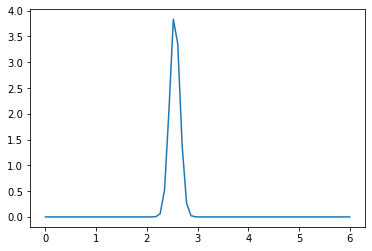

In [139]:
import scipy.stats as stats

res = 900; #resolution
t_tot = 6.0; #final time
tlist = np.linspace(0.0, t_tot, 70) #time of dynamics

w_1 = 0.5; w_2 = 1.0; w_3 = 0.0; w_i = 0.02; #parameters for pulses (frequencies)
A_s = 0.2; A_d = 0.3; w_s = np.pi/t_tot; #more parameters for pulses (amplitudes)
start1 = 2.0; start2 = 8.0; #more parameter for pulses (square pulse start times)
width1 = 0.35*np.pi; width2 = 0.5*np.pi; #more parameter for pulses (width of start times)
gAmp = 1; center = (2.55); gstd = 0.1; #more parameter for pulses (gaussian pulse parameters)
t_d = 5.0; #decay time

args = {'A_s': A_s, 'A_d': A_s, 'w_s': w_s, 't_d': t_d, 'gAmp':gAmp,'center':center,'gstd':gstd, 'start1':start1, 'width1':width1, 'start2':start2, 'width2':width2} #dictionary to store parameters values

#gaussian pulses
def pgauss(t, args):
    return args['gAmp']*stats.norm.pdf(t, args['center'], args['gstd'])
#pulse 1 function
def pul(times, args):
    return (np.heaviside((times - args['start1']-2/res), 0.5) + np.heaviside(-(times - args['start1']-2/res) + args['width1']+2/res, 0.5) - 1)
#pulse 3 function
def pul3(times, args):
    return pul(times, args)*pgauss(times, args)
plt.plot(tlist,pul3(tlist, args))

In [ ]:
# Python - Sample Application to set up the AWG
#          to output an array that was created with numpy.
# ----------
# Import required system components
import sys
 
# ----------
# Append the system path to include the
# location of Keysight SD1 Programming Libraries then import the library
sys.path.append('C:\Program Files (x86)\Keysight\SD1\Libraries\Python')
import keysightSD1 # Import Python SD1 library and AWG/Digitizer commands.
import numpy # Import numpy which is used to make an array
 
# ----------
# Specify values for variables
product = 'M3202A' # Product's model number
chassis = 1             # Chassis number holding product
slot = 4                      # Slot number of product in chassis
channel = 1                # Channel being used
amplitude = 0.1      # (Unit: Vpp) Amplitude of AWG output signal (0.1 Vpp)
waveshape = keysightSD1.SD_Waveshapes.AOU_AWG # Specify AWG output
 
delay = 0     # (Unit: ns) Delay after trigger before generating output.
cycles = 0          # Number of cycles. Zero specifies infinite cycles.
              # Otherwise, a new trigger is required to actuate each cycle
prescaler = 0 # Integer division reduces high freq signals to lower frequency
 
# ----------
# Select settings and use specified variables
awg = keysightSD1.SD_AOU()                # Creates SD_AOU object called awg
awg.openWithSlot(product, chassis, slot) # Connects awg object to module
awg.channelAmplitude(channel, amplitude) # Sets output amplitude for awg
awg.channelWaveShape(channel, waveshape) # Sets output signal type for awg
 
awg.waveformFlush() # Cleans the queue
awg.AWGflush(channel) # Stops signal from outputing out of channel 1
 
# Create an array that represents a sawtooth signal using "numpy"
array = numpy.zeros(1000) # Create array of zeros with 1000 elements
array[0] = -0.5           # Initialize element 0 as -0.5
 
for i in range(1, len(array)): # This for..loop will increment from -0.5
array[i] = array[i-1] + .001 # Increment by .001 every iteration
 
wave = keysightSD1.SD_Wave() # Create SD_Wave object and call it "wave"
# (will place the array inside "wave")
error = wave.newFromArrayDouble(keysightSD1.SD_WaveformTypes.WAVE_ANALOG, array.tolist()) # Place the array into the "wave" object
waveID = 0 # This number is arbitrary and used to identify the waveform
 
awg.waveformLoad(wave, waveID) # Load the "wave" object and give it an ID
awg.AWGqueueWaveform(channel, waveID, keysightSD1.SD_TriggerModes.SWHVITRIG, delay, cycles, prescaler)      # Queue waveform to prepare it to be output
 
# ----------
awg.AWGstart(channel)       # Start the AWG
awg.AWGtrigger(channel) # Trigger the AWG to begin
# ----------
# Close the connection between the AWG object and the physical AWG hardware.
awg.close()

In [10]:
# Create an array that represents a sawtooth signal using "numpy"
array = np.zeros(1000) # Create array of zeros with 1000 elements
array[0] = -0.5           # Initialize element 0 as -0.5
 
for i in range(1, len(array)): # This for..loop will increment from -0.5
    array[i] = array[i-1] + .001 # Increment by .001 every iteration

In [12]:
np.shape(array)

(1000,)